# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

# EDA

In [4]:
# Checking column names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
# Checking data shape(Row & Columns)
df.shape

(918, 12)

In [6]:
# Checking NULL values in data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
# Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
# Describing numerical columns of data
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [9]:
# Checking duplicates in data
df.duplicated().sum()

0

<Axes: xlabel='HeartDisease'>

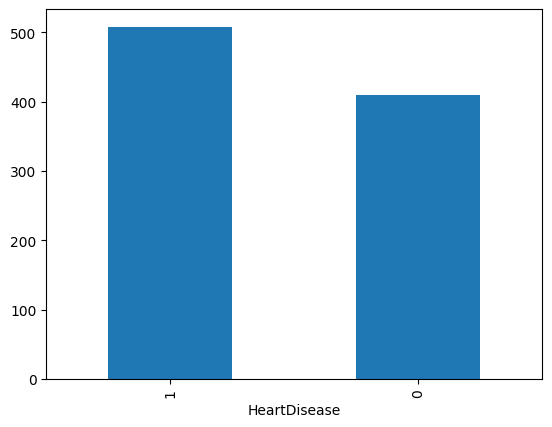

In [10]:
# Creating a barchart to check how many people suffer from Heart Disease
df['HeartDisease'].value_counts().plot(kind='bar')

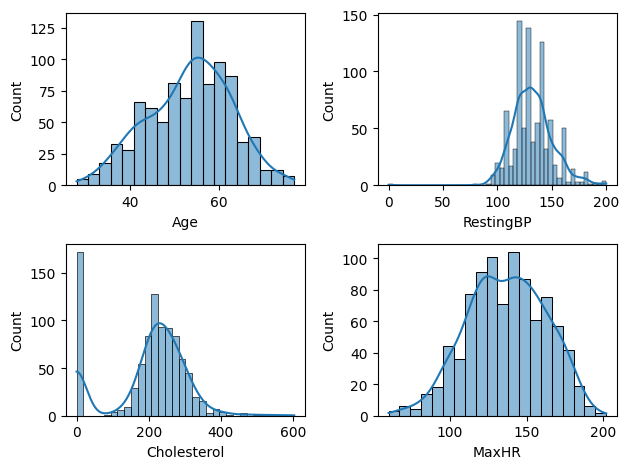

In [11]:
# Plotting Sub Plots to check outliers
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout()

In [12]:
# Checking Cholesterol value counts
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [13]:
# Find the mean for 'Cholesterol' column where values in not equal to 0
ch_mean = df['Cholesterol'].where(df['Cholesterol'] != 0).mean().round(2)
ch_mean

244.64

In [14]:
# Replace 0 with mean of 'Cholesterol'
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)

In [15]:
# Find mean for 'RestingBP' column where values in not equal to 0
rBP_mean = df['RestingBP'].where(df['RestingBP'] != 0).mean().round(2)

In [16]:
# Replace 0 with mean of 'RestingBP'
df['RestingBP'] = df['RestingBP'].replace(0,rBP_mean)

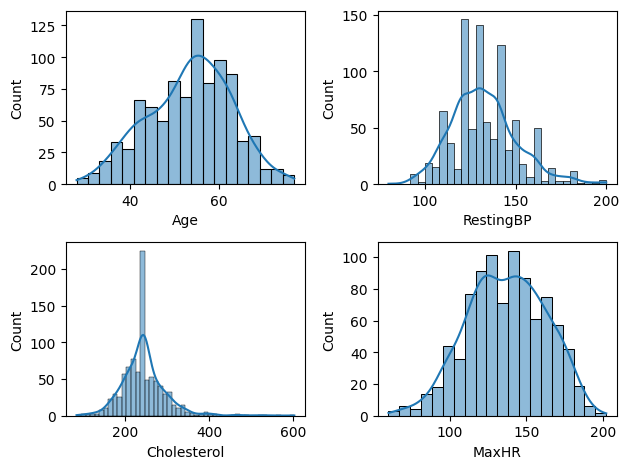

In [17]:
# Plotting sub plots to check the changes
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout()

In [18]:
# Finding the object columns in data
df.columns[df.dtypes == 'object']

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

<Axes: xlabel='Sex', ylabel='count'>

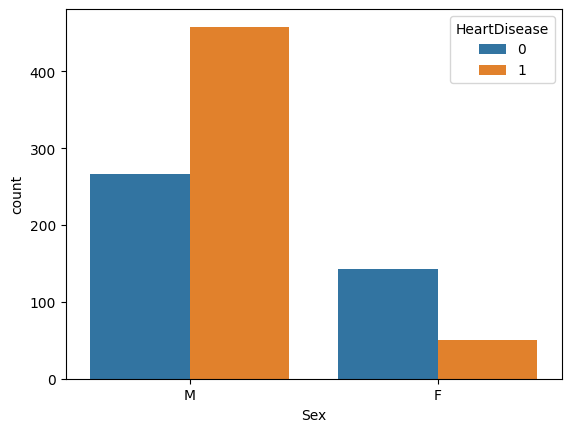

In [19]:
# Plot a countplot to visualize the relationship between Gender and Heart Disease
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

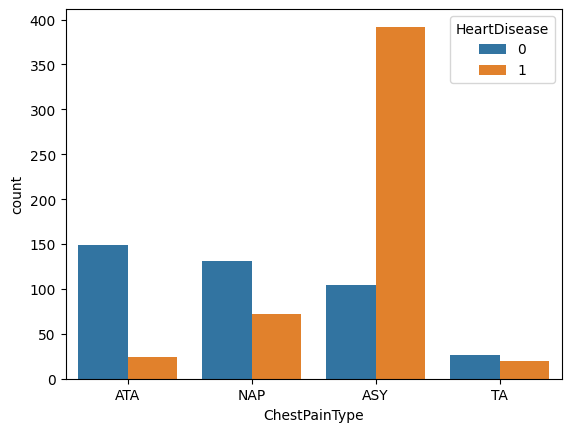

In [20]:
# Plot a countplot to visualize the relationship between Chest Pain Type and Heart Disease
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

<Axes: xlabel='RestingECG', ylabel='count'>

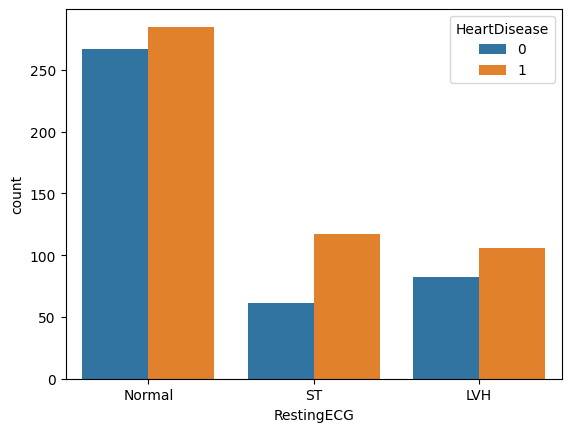

In [21]:
# Plot a countplot to visualize the relationship between RestingECG (Resting Electrocardiogram) and Heart Disease
sns.countplot(x=df['RestingECG'],hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

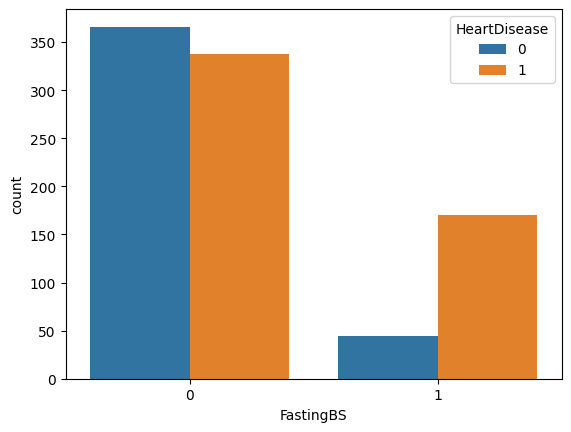

In [22]:
# Plot a countplot to visualize the relationship between Fasting Blood Sugar (FastingBS) and Heart Disease
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

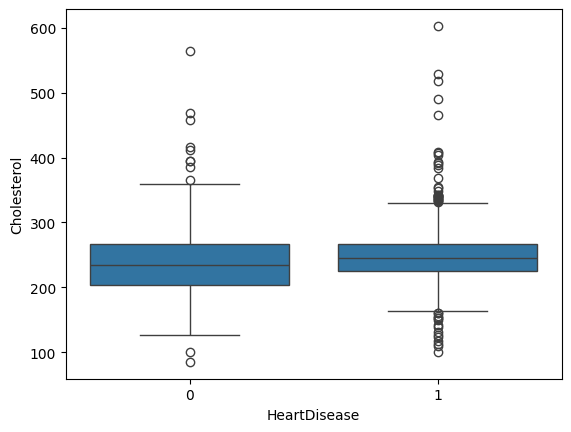

In [23]:
# Create a boxplot to compare the distribution of Cholesterol levels for people with and without Heart Disease
sns.boxplot(y=df['Cholesterol'], x=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

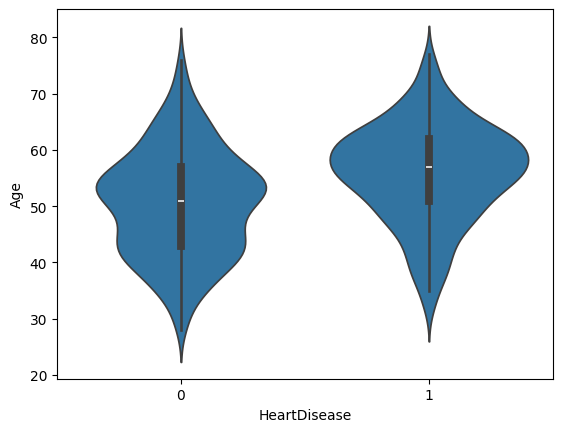

In [24]:
# Create a violin plot to visualize the age distribution for people with and without Heart Disease
sns.violinplot(x=df['HeartDisease'],y=df['Age'])

<Axes: >

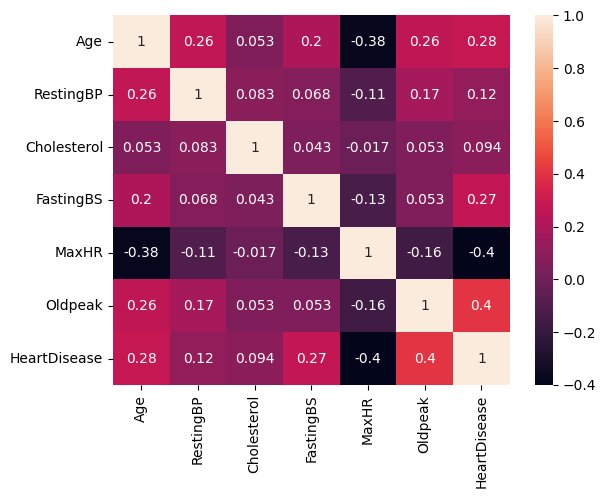

In [25]:
# Create a heatmap to visualize the correlation between all numeric features in the dataset
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data preprocessing & Cleaning

In [26]:
# Encode categorical variables in the dataframe using one-hot encoding
df_encode =  pd.get_dummies(df,drop_first=True).astype(int)

In [27]:
df_encode

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172        0             0   
1     49        160          180          0    156        1             1   
2     37        130          283          0     98        0             0   
3     48        138          214          0    108        1             1   
4     54        150          195          0    122        0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132        1             1   
914   68        144          193          1    141        3             1   
915   57        130          131          0    115        1             1   
916   57        130          236          0    174        0             1   
917   38        138          175          0    173        0             0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0        1                  1                  0                 0   
1        0                  0                  1                 0   
2        1                  1                  0                 0   
3        0                  0                  0                 0   
4        1                  0                  1                 0   
..     ...                ...                ...               ...   
913      1                  0                  0                 1   
914      1                  0                  0                 0   
915      1                  0                  0                 0   
916      0                  1                  0                 0   
917      1                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                    1              0                 0              0   
1                    1              0                 0              1   
2                    0              1                 0              0   
3                    1              0                 1              1   
4                    1              0                 0              0   
..                 ...            ...               ...            ...   
913                  1              0                 0              1   
914                  1              0                 0              1   
915                  1              0                 1              1   
916                  0              0                 0              1   
917                  1              0                 0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 16 columns]

In [28]:
# Import necessary modules from scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Split the dataset into features (X) and target variable (y)
# X contains all columns except 'HeartDisease' (the input features)
# y contains the 'HeartDisease' column (the target to predict)
X = df_encode.drop('HeartDisease',axis=1)
y = df_encode['HeartDisease']

In [30]:
# Print X
X

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
0     40        140          289          0    172        0      1   
1     49        160          180          0    156        1      0   
2     37        130          283          0     98        0      1   
3     48        138          214          0    108        1      0   
4     54        150          195          0    122        0      1   
..   ...        ...          ...        ...    ...      ...    ...   
913   45        110          264          0    132        1      1   
914   68        144          193          1    141        3      1   
915   57        130          131          0    115        1      1   
916   57        130          236          0    174        0      0   
917   38        138          175          0    173        0      1   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                    1                  0                 0   
1                    0                  1                 0   
2                    1                  0                 0   
3                    0                  0                 0   
4                    0                  1                 0   
..                 ...                ...               ...   
913                  0                  0                 1   
914                  0                  0                 0   
915                  0                  0                 0   
916                  1                  0                 0   
917                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                    1              0                 0              0   
1                    1              0                 0              1   
2                    0              1                 0              0   
3                    1              0                 1              1   
4                    1              0                 0              0   
..                 ...            ...               ...            ...   
913                  1              0                 0              1   
914                  1              0                 0              1   
915                  1              0                 1              1   
916                  0              0                 0              1   
917                  1              0                 0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 15 columns]

In [31]:
# Split the dataset into training and testing sets
# - X_train, y_train: training features and labels (used to train the model)
# - X_test, y_test: testing features and labels (used to evaluate the model)
# - test_size=0.2: 20% of the data is reserved for testing
# - random_state=42: ensures reproducible split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [33]:
# Training the various models
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    'SVM' : SVC()
}

In [34]:
results = []

In [35]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    results.append({
        'model' : name,
        'Accuracy' : round(acc*100,4),
        'f1 score' : round(f1*100,4)
    })

In [36]:
results

[{'model': 'Logistic Regression', 'Accuracy': 86.9565, 'f1 score': 88.5714},
 {'model': 'KNN', 'Accuracy': 86.413, 'f1 score': 88.1517},
 {'model': 'Naive Bayes', 'Accuracy': 85.3261, 'f1 score': 86.8293},
 {'model': 'Decision Tree', 'Accuracy': 78.2609, 'f1 score': 80.3922},
 {'model': 'SVM', 'Accuracy': 84.7826, 'f1 score': 86.7925}]

In [37]:
# Save the trained model, scaler, and feature columns to disk using joblib
# - models['KNN']: the trained KNN classifier is saved as 'KNN_HAPS.pkl'
# - scaler: the StandardScaler object is saved as 'scaler.pkl' for future scaling of input data
# - X.columns.tolist(): list of feature column names is saved as 'columns.pkl' to ensure consistent input during prediction
# import joblib
# joblib.dump(models['KNN'],'KNN_HAPS.pkl')
# joblib.dump(scaler,'scaler.pkl')
# joblib.dump(X.columns.tolist(),'columns.pkl')

In [45]:
import pickle

# Save the KNN model
with open('KNN_HAPS.pkl', 'wb') as f:
    pickle.dump(models['KNN'], f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the column names
with open('columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)